# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Wahyu Setiawan
- **Email:** wawanslf81@gmail.com
- **ID Dicoding:** wahyu_setiawan22

## Menentukan Pertanyaan Bisnis

- Berapa prediksi total penyewa sepeda harian?
- Pada jam berapa terjadi permintaan sewa sepeda tertinggi?
- Kapan waktu spesifik untuk konversi customer casual menjadi registered?
- Kapan waktu yang tepat untuk melakukan maintenance sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
df = pd.read_csv('/content/hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- mendapatkan data dari sistem sepeda berbagi di Dicobike
- menampilkan data sistem berbagi sepeda Dicobike

### Assessing Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- nama kolom (dteday, yr, mnth, hr, temp, hum, cnt) menjadi (date_day, year, month, hour, temperature, humidity, count_customer) agar mudah dipahami
- tidak ada data null
- tipe data dteday perlu diubah menjadi datetime
- data instant akan dihapus karena index

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


insight:
- value data season, holiday, weekday, workingday, dan weathersit agar tipe data menjadi object.
- value yr diubah 0 = 2011, 1 = 2012
- convert entry temp, atemp, hum, windspeed menjadi data normal (sebelum di normalisasi)

In [ ]:
df.duplicated().sum()

np.int64(0)

insight:
- tidak ada data duplikat

| diagnosa data | action |
|---|---|
| nama kolom (dteday, yr, mnth, hr, temp, atemp, hum, cnt) | diubah menjadi (date_day, year, month, hour, temperature, feeling_temperature, humidity, count_customer) |
| dteday | ubah tipe data menjadi datetime |
| data instant | dihapus |
| value season | diubah (1: spring, 2: summer, 3: fall, 4: winter) |
| value holiday | diubah (0: Not a Holiday, 1: Holiday)
| value Weekday | diubah menjadi nama hari |
| value workingday | diubah (0: Off Work, 1: Workingday)
| value weathersit | diubah (1: Clear, 2: Mist, 3: Light Rain/Snow, 4: Extreme Weather)|
| value year | diubah (0: 2011, 1: 2012) |
| value temp, atemp, hum, windspeed | diubah sebelum normalisasi |

### Cleaning Data

In [ ]:
df_copy = df.copy()

membuat copy untuk data cleaning

#### Rename Column

In [ ]:
df_copy.rename(columns={
    'dteday' : 'date_day',
    'yr' : 'year',
    'mnth' : 'month',
    'hr' : 'hour',
    'temp' : 'temperature',
    'atemp' : 'feeling_temperature',
    'hum' : 'humidity',
    'cnt' : 'count_customer'
}, inplace=True)

In [ ]:
df_copy.head()

,instant,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count_customer
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


insight:
- merubah nama kolom agar mudah dipahami

#### Convert date_day to Datetime

In [ ]:
df_copy['date_day'] = pd.to_datetime(df_copy['date_day'])

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   instant              17379 non-null  int64         
 1   date_day             17379 non-null  datetime64[ns]
 2   season               17379 non-null  int64         
 3   year                 17379 non-null  int64         
 4   month                17379 non-null  int64         
 5   hour                 17379 non-null  int64         
 6   holiday              17379 non-null  int64         
 7   weekday              17379 non-null  int64         
 8   workingday           17379 non-null  int64         
 9   weathersit           17379 non-null  int64         
 10  temperature          17379 non-null  float64       
 11  feeling_temperature  17379 non-null  float64       
 12  humidity             17379 non-null  float64       
 13  windspeed            17379 non-

insight:
- merubah tipe data date_day dari object menjadi datetime

#### Drop Columns Instant

In [ ]:
df_copy.drop(['instant'], axis=1, inplace=True)

In [ ]:
df_copy.head()

,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count_customer
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


insight:
- menghapus kolom instant, karena data index.

#### Change Entry Data

##### Season

In [ ]:
season_mapping = {
    1 : 'Spring',
    2 : 'Summer',
    3 : 'Fall',
    4 : 'Winter'
}

df_copy['season'] = df_copy['season'].map(season_mapping)
df_copy.head()

,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count_customer
0,2011-01-01,Spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


insight:
- mengganti entry season

##### Holiday

In [ ]:
df_copy['holiday'].replace({
    0 : 'No',
    1 : 'Yes'
}, inplace=True)

df_copy.head()

/tmp/ipython-input-1622750548.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['holiday'].replace({


,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count_customer
0,2011-01-01,Spring,0,1,0,No,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,0,1,1,No,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,0,1,2,No,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,0,1,3,No,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,0,1,4,No,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


insight:
- mengganti entry holiday

##### Weekday

In [ ]:
weekday_mapping = {
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday'
}

df_copy['weekday'] = df_copy['weekday'].map(weekday_mapping)
df_copy.head()

,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count_customer
0,2011-01-01,Spring,0,1,0,No,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,0,1,1,No,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,0,1,2,No,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,0,1,3,No,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,0,1,4,No,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


insight:
- mengganti entry weekday

##### Workingday

In [ ]:
df_copy['workingday'].replace({
    0 : 'No',
    1 : 'Yes'
}, inplace=True)

df_copy.head()

/tmp/ipython-input-1440532548.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['workingday'].replace({


,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count_customer
0,2011-01-01,Spring,0,1,0,No,Saturday,No,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,0,1,1,No,Saturday,No,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,0,1,2,No,Saturday,No,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,0,1,3,No,Saturday,No,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,0,1,4,No,Saturday,No,1,0.24,0.2879,0.75,0.0,0,1,1


insight:
- mengganti entry workingday

##### Weather

In [ ]:
weather_mapping = {
    1 : 'Clear',
    2 : 'Mist',
    3 : 'Light Rain/Snow',
    4 : 'Extreme Weather'
}

df_copy['weathersit'] = df_copy['weathersit'].map(weather_mapping)
df_copy.head()

,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count_customer
0,2011-01-01,Spring,0,1,0,No,Saturday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,0,1,1,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,0,1,2,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,0,1,3,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,0,1,4,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


insight:
- mengganti entry weathersit

##### Year

In [ ]:
df_copy['year'].replace({
    0 : 2011,
    1 : 2012
}, inplace=True)

df_copy.head()

/tmp/ipython-input-4288326513.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['year'].replace({


,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count_customer
0,2011-01-01,Spring,2011,1,0,No,Saturday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,1,1,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,1,2,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,1,3,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,1,4,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


insight:
- mengganti entry year

#### Inverse Data Normalization

##### Temperature

In [ ]:
def inverse_min_max(df_scaled, x_min, x_max):
  return (df_scaled * (x_max - x_min)) + x_min

def inverse_divide(df_scaled, multipier):
  return df_scaled * multipier

insight:
- membuat fungsi untuk inverse data normalisasi

In [ ]:
df_copy['temperature'] = inverse_min_max(df_copy['temperature'], x_min=-8, x_max=39)

In [ ]:
df_copy.head()

,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count_customer
0,2011-01-01,Spring,2011,1,0,No,Saturday,No,Clear,3.28,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,1,1,No,Saturday,No,Clear,2.34,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,1,2,No,Saturday,No,Clear,2.34,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,1,3,No,Saturday,No,Clear,3.28,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,1,4,No,Saturday,No,Clear,3.28,0.2879,0.75,0.0,0,1,1


inverse data hasil normalisasi

##### Feeling Temperature

In [ ]:
df_copy['feeling_temperature'] = inverse_min_max(df_copy['feeling_temperature'], x_min=-16, x_max=50)
df_copy.head()

,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count_customer
0,2011-01-01,Spring,2011,1,0,No,Saturday,No,Clear,3.28,3.0014,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,1,1,No,Saturday,No,Clear,2.34,1.9982,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,1,2,No,Saturday,No,Clear,2.34,1.9982,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,1,3,No,Saturday,No,Clear,3.28,3.0014,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,1,4,No,Saturday,No,Clear,3.28,3.0014,0.75,0.0,0,1,1


In [ ]:
df_copy.describe().T

,count,mean,min,25%,50%,75%,max,std
date_day,17379,2012-01-02 04:08:34.552045568,2011-01-01 00:00:00,2011-07-04 00:00:00,2012-01-02 00:00:00,2012-07-02 00:00:00,2012-12-31 00:00:00,NaN
year,17379.0,2011.502561,2011.0,2011.0,2012.0,2012.0,2012.0,0.500008
month,17379.0,6.537775,1.0,4.0,7.0,10.0,12.0,3.438776
hour,17379.0,11.546752,0.0,6.0,12.0,18.0,23.0,6.914405
temperature,17379.0,15.358397,-7.06,7.98,15.5,23.02,39.0,9.050138
feeling_temperature,17379.0,15.401157,-16.0,5.9978,15.9968,24.9992,50.0,11.342114
humidity,17379.0,0.627229,0.0,0.48,0.63,0.78,1.0,0.19293
windspeed,17379.0,0.190098,0.0,0.1045,0.194,0.2537,0.8507,0.12234
casual,17379.0,35.676218,0.0,4.0,17.0,48.0,367.0,49.30503
registered,17379.0,153.786869,0.0,34.0,115.0,220.0,886.0,151.357286


inverse data hasil normalisasi feeling temperature

##### Humidity

In [ ]:
df_copy['humidity'] = inverse_divide(df_copy['humidity'], multipier=100)
df_copy.sample(7)

,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count_customer
4566,2011-07-14,Fall,2011,7,4,No,Thursday,Yes,Clear,21.14,24.9992,53.0,0.2537,0,6,6
14521,2012-09-02,Fall,2012,9,6,No,Sunday,No,Mist,23.02,22.9994,89.0,0.0000,2,13,15
16454,2012-11-23,Winter,2012,11,8,No,Friday,Yes,Clear,3.28,1.0016,87.0,0.0896,11,83,94
10633,2012-03-24,Summer,2012,3,4,No,Saturday,No,Clear,16.44,17.0000,83.0,0.0896,1,6,7
7605,2011-11-18,Winter,2011,11,12,No,Friday,Yes,Clear,7.04,5.9978,33.0,0.0000,22,143,165
11094,2012-04-12,Summer,2012,4,11,No,Thursday,Yes,Clear,11.74,11.9972,47.0,0.2985,50,174,224
6454,2011-10-01,Winter,2011,10,12,No,Saturday,No,Mist,10.80,11.0006,82.0,0.2537,28,130,158


inverse data normalisasi humidity dengan dikalikan 100, untuk mendapatkan data normalnya

##### Windspeed

In [ ]:
df_copy['windspeed'] = inverse_divide(df_copy['windspeed'], multipier=67)

In [ ]:
df_copy.head()

,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count_customer
0,2011-01-01,Spring,2011,1,0,No,Saturday,No,Clear,3.28,3.0014,81.0,0.0,3,13,16
1,2011-01-01,Spring,2011,1,1,No,Saturday,No,Clear,2.34,1.9982,80.0,0.0,8,32,40
2,2011-01-01,Spring,2011,1,2,No,Saturday,No,Clear,2.34,1.9982,80.0,0.0,5,27,32
3,2011-01-01,Spring,2011,1,3,No,Saturday,No,Clear,3.28,3.0014,75.0,0.0,3,10,13
4,2011-01-01,Spring,2011,1,4,No,Saturday,No,Clear,3.28,3.0014,75.0,0.0,0,1,1


inverse data windspeed dengan dikalikan 67, untuk mendapatkan data aslinya

In [ ]:
df_copy.describe().T

,count,mean,min,25%,50%,75%,max,std
date_day,17379,2012-01-02 04:08:34.552045568,2011-01-01 00:00:00,2011-07-04 00:00:00,2012-01-02 00:00:00,2012-07-02 00:00:00,2012-12-31 00:00:00,NaN
year,17379.0,2011.502561,2011.0,2011.0,2012.0,2012.0,2012.0,0.500008
month,17379.0,6.537775,1.0,4.0,7.0,10.0,12.0,3.438776
hour,17379.0,11.546752,0.0,6.0,12.0,18.0,23.0,6.914405
temperature,17379.0,15.358397,-7.06,7.98,15.5,23.02,39.0,9.050138
feeling_temperature,17379.0,15.401157,-16.0,5.9978,15.9968,24.9992,50.0,11.342114
humidity,17379.0,62.722884,0.0,48.0,63.0,78.0,100.0,19.292983
windspeed,17379.0,12.73654,0.0,7.0015,12.998,16.9979,56.9969,8.196795
casual,17379.0,35.676218,0.0,4.0,17.0,48.0,367.0,49.30503
registered,17379.0,153.786869,0.0,34.0,115.0,220.0,886.0,151.357286


## Exploratory Data Analysis (EDA) & Visualization

In [ ]:
# Explore data tahunan
df_byyear = df_copy.groupby(['year']).agg(
    total_customer_casual=('casual', 'sum'),
    total_customer_registered=('registered', 'sum'),
    total_customer=('count_customer', 'sum')
).reset_index()

In [ ]:
df_byyear

,year,total_customer_casual,total_customer_registered,total_customer
0,2011,247252,995851,1243103
1,2012,372765,1676811,2049576


membuat groupby berdasarkan data year untuk mencari trend tahunan customer bike share.

In [ ]:
def bar_diff(label, value, title):
  fig, ax = plt.subplots(figsize=(9, 5))
  bars = ax.bar(
      label,
      value
  )

  offset = max(value) * 0.02

  for i in range(1, len(bars)):
    current_val = value[i]
    previous_val = value[i - 1]

    diff = ((current_val - previous_val) / previous_val * 100)

    color = 'green' if diff > 0 else 'red'
    text_label = f'{diff:+.2f}%'

    ax.text(bars[i].get_x() + bars[i].get_width() / 2,
            bars[i].get_height() + offset,
            text_label,
            ha='center',
            va='bottom',
            color=color,
            fontweight='bold',
            fontsize=10)

  ax.set_ylim(0, max(value) * 1.2)
  ax.set_title(title)
  plt.show()

fungsi python untuk membuat bar chart pertumbuhan customer.

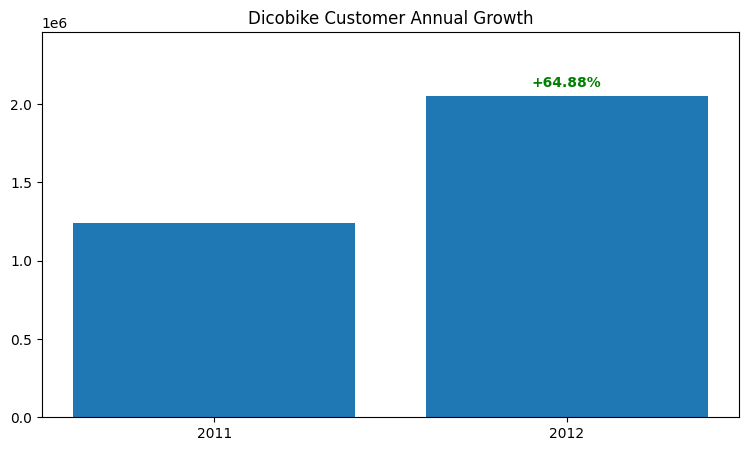

In [ ]:
bar_diff(df_byyear['year'].astype(str), df_byyear['total_customer'], title='Dicobike Customer Annual Growth')

peningkatan customer Dicobike di 2022 sangat signifikan sebesar 64.88%

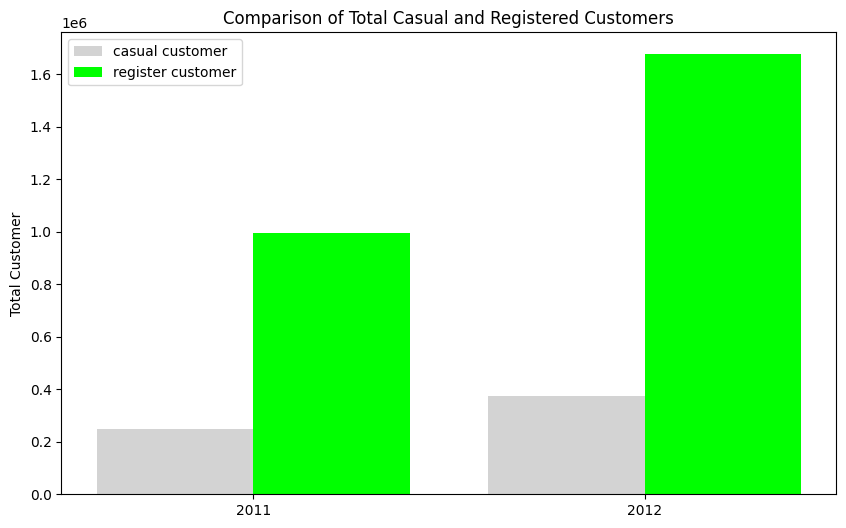

In [ ]:
label = df_byyear['year'].astype(str)
value1 = df_byyear['total_customer_casual']
value2 = df_byyear['total_customer_registered']

n = np.arange(len(df_byyear['year'].astype(str)))
width = 0.4

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(n - width/2, df_byyear['total_customer_casual'], width, label='casual customer', color='lightgray')
bar2 = ax.bar(n + width/2, df_byyear['total_customer_registered'], width, label='register customer', color='lime')

ax.set_ylabel('Total Customer')
ax.set_title('Comparison of Total Casual and Registered Customers')
ax.set_xticks(n)
ax.set_xticklabels(label)
ax.legend()

plt.show()

pengguna sepeda di Dicobike mengalami kenaikan di setiap segment customer. ini mengindikasikan Dicobike masih berpotensi untuk menambah customer mereka terutama untuk registered customer.

#### Bike Share in 2012

In [ ]:
df_2012 = df_copy[df_copy['year'] == 2012]

In [ ]:
df_2012_byseason = df_2012.groupby('season').agg(
    total_customer_casual=('casual', 'sum'),
    total_customer_registered=('registered', 'sum'),
    total_customer=('count_customer', 'sum')
).reset_index()

df_2012_byseason

,season,total_customer_casual,total_customer_registered,total_customer
0,Fall,130641,510838,641479
1,Spring,39197,282151,321348
2,Summer,125958,445315,571273
3,Winter,76969,438507,515476


insight:
- penurunan customer di 2012 terjadi pada saat musim semi.
- puncak sewa sepeda terjadi pada saat musim gugur.

In [ ]:
df_2012_bymonth = df_2012.groupby('month').agg(
    total_customer_casual=('casual', 'sum'),
    total_customer_registered=('registered', 'sum'),
    total_customer=('count_customer', 'sum')
).reset_index()

df_2012_bymonth

,month,total_customer_casual,total_customer_registered,total_customer
0,1,8969,87775,96744
1,2,8721,94416,103137
2,3,31618,133257,164875
3,4,38456,135768,174224
4,5,44235,151630,195865
5,6,43294,159536,202830
6,7,41705,161902,203607
7,8,43197,171306,214503
8,9,43778,174795,218573
9,10,34538,164303,198841


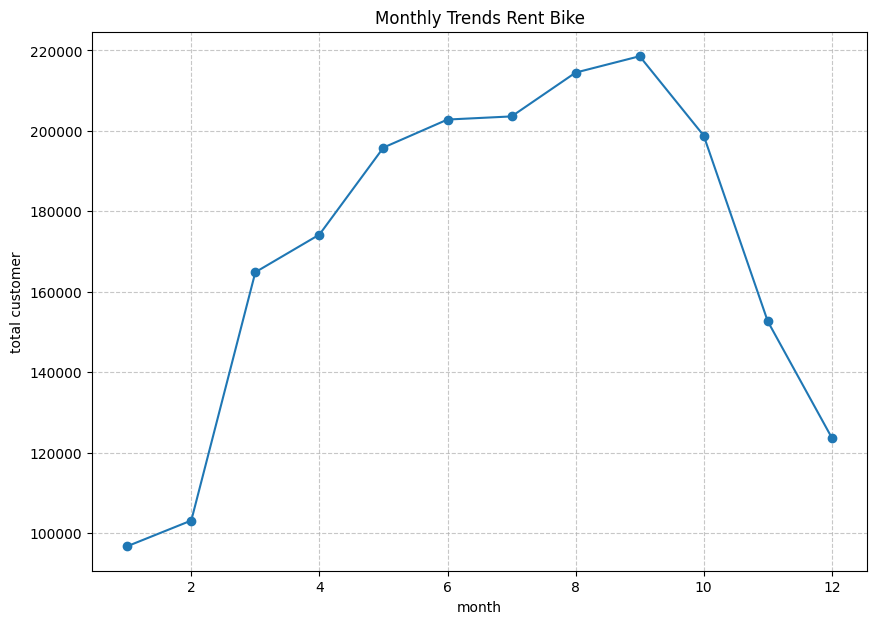

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(
    df_2012_bymonth['month'],
    df_2012_bymonth['total_customer'],
    marker='o',
    linestyle='-'
)

plt.title('Monthly Trends Rent Bike')
plt.xlabel('month')
plt.ylabel('total customer')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

memasuki maret permintaan sewa sepeda mengalami peningkatan hingga Oktober. mengindikasikan awal masuk musim panas terjadi lonjakan permintaan sepeda.

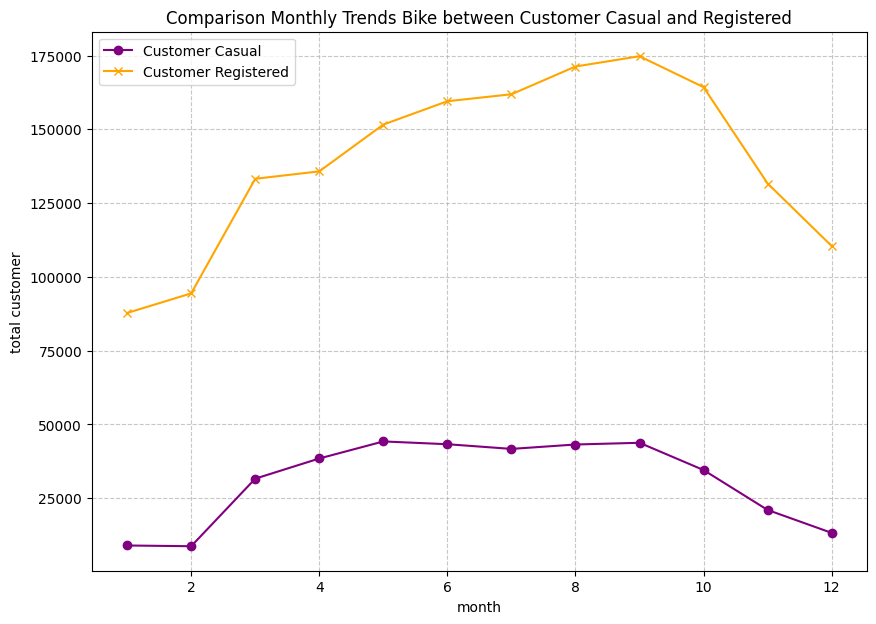

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(
    df_2012_bymonth['month'],
    df_2012_bymonth['total_customer_casual'],
    label='Customer Casual',
    marker='o',
    linestyle='-',
    color='purple'
)

plt.plot(
    df_2012_bymonth['month'],
    df_2012_bymonth['total_customer_registered'],
    label='Customer Registered',
    marker='x',
    linestyle='-',
    color='orange'
)

plt.title('Comparison Monthly Trends Bike between Customer Casual and Registered')
plt.xlabel('month')
plt.ylabel('total customer')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

trend menunjukkan pola yang mirip, tetapi pertumbuhan sewa sepeda customer casual tidak sebesar customer registered

In [ ]:
df_2012_byweekday = df_2012.groupby('weekday').agg(
    avg_customer_casual=('casual', 'mean'),
    avg_customer_registered=('registered', 'mean'),
    avg_customer=('count_customer', 'mean')
).reset_index()

df_2012_byweekday

,weekday,avg_customer_casual,avg_customer_registered,avg_customer
0,Friday,39.090545,205.928686,245.019231
1,Monday,31.530547,189.757235,221.287781
2,Saturday,75.564904,163.268429,238.833333
3,Sunday,63.664831,146.369001,210.033832
4,Thursday,31.316212,218.156501,249.472713
5,Tuesday,27.501219,207.081235,234.582453
6,Wednesday,29.421348,214.462279,243.883628


In [ ]:
sort_weekday = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

df_2012_byweekday['weekday'] = pd.Categorical(df_2012_byweekday['weekday'], categories=sort_weekday, ordered=True)

df_2012_byweekday = df_2012_byweekday.sort_values('weekday')

df_2012_byweekday

,weekday,avg_customer_casual,avg_customer_registered,avg_customer
3,Sunday,63.664831,146.369001,210.033832
1,Monday,31.530547,189.757235,221.287781
5,Tuesday,27.501219,207.081235,234.582453
6,Wednesday,29.421348,214.462279,243.883628
4,Thursday,31.316212,218.156501,249.472713
0,Friday,39.090545,205.928686,245.019231
2,Saturday,75.564904,163.268429,238.833333


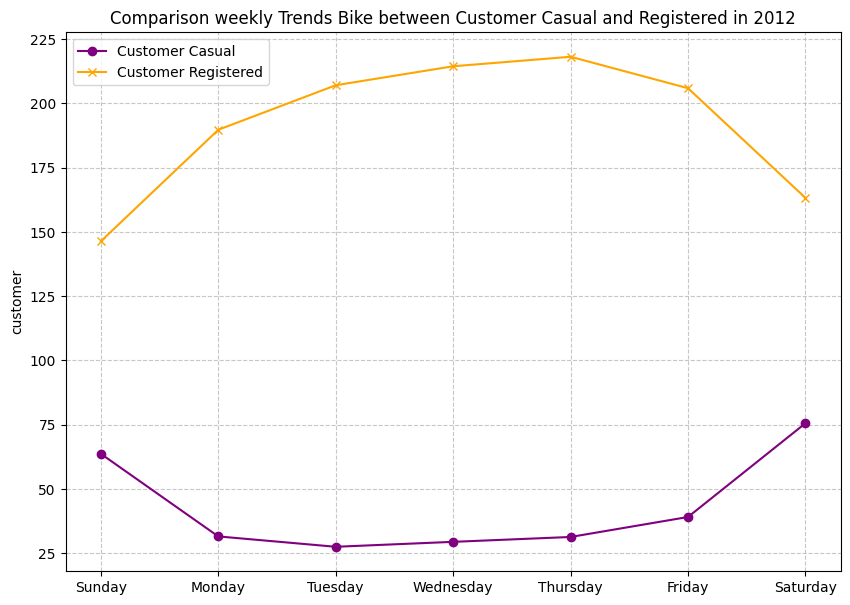

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(
    df_2012_byweekday['weekday'],
    df_2012_byweekday['avg_customer_casual'],
    label='Customer Casual',
    marker='o',
    linestyle='-',
    color='purple'
)

plt.plot(
    df_2012_byweekday['weekday'],
    df_2012_byweekday['avg_customer_registered'],
    label='Customer Registered',
    marker='x',
    linestyle='-',
    color='orange'
)

plt.title('Comparison weekly Trends Bike between Customer Casual and Registered in 2012')
plt.xlabel('')
plt.ylabel('customer')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Insight:
- Customer registered menunjukkan banyak menyewa sepeda saat senin hingga jumat yang merupakan hari kerja. ini mengindikasikan customer registered menggunakan sepeda untuk keperluan pergi ke tempat kerja.
- Customer Casual banyak menyewa si hari Sabtu dan minggu. mengindikasikan customer ini menggunakan sepeda untuk aktifitas seperti olahraga melepas penat.

In [ ]:
df_2012_byhour = df_2012.groupby('hour').agg(
    avg_customer_casual=('casual', 'mean'),
    avg_customer_registered=('registered', 'mean'),
    avg_customer=('count_customer', 'mean')
).reset_index()

df_2012_byhour

,hour,avg_customer_casual,avg_customer_registered,avg_customer
0,0,10.827397,53.802740,64.630137
1,1,7.247253,32.879121,40.126374
2,2,5.074380,21.622590,26.696970
3,3,2.645070,10.687324,13.332394
4,4,1.230556,6.022222,7.252778
5,5,1.604396,23.406593,25.010989
6,6,4.505495,89.810440,94.315934
7,7,11.728022,255.417582,267.145604
8,8,24.153846,430.609890,454.763736
9,9,37.346154,237.247253,274.593407


### At What Time is the Highest Demand for Bike Rentals?

### When is the right time to do Bike Maintenance?

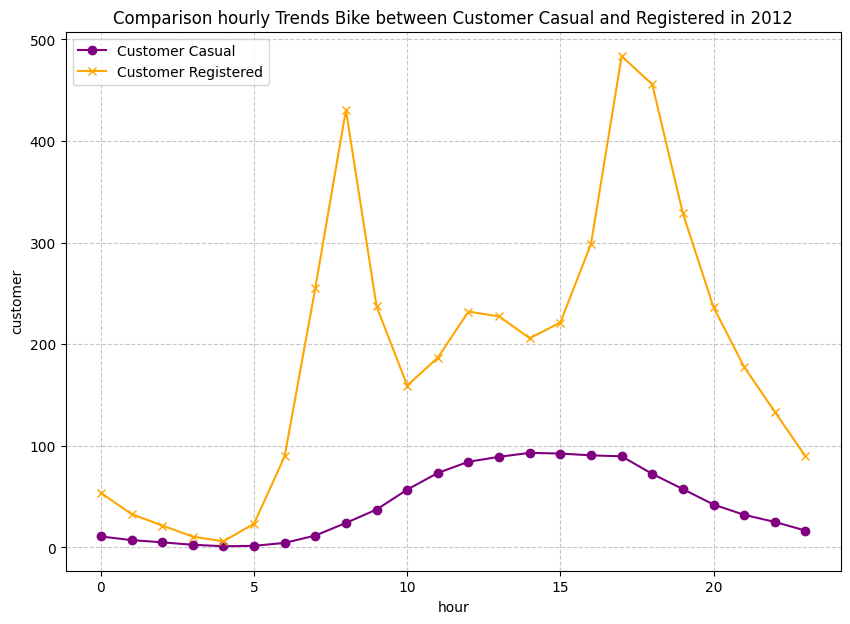

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(
    df_2012_byhour['hour'],
    df_2012_byhour['avg_customer_casual'],
    label='Customer Casual',
    marker='o',
    linestyle='-',
    color='purple'
)

plt.plot(
    df_2012_byhour['hour'],
    df_2012_byhour['avg_customer_registered'],
    label='Customer Registered',
    marker='x',
    linestyle='-',
    color='orange'
)

plt.title('Comparison hourly Trends Bike between Customer Casual and Registered in 2012')
plt.xlabel('hour')
plt.ylabel('customer')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

insight:
- Puncak sewa sepeda untuk **"customer registered"** di jam 8 dan jam 17 hingga 18. yang merupakan jam pulang kerja. semakin menunjukkan customer ini menyewa sepeda untuk pulang pergi kantor.
- distribusi cenderung data tidak ada jam sibuk. apakah mungkin **customer casual** merupakan wisatawan? atau pengguna yang waktu fleksibel.
- titik terendah sewa sepeda saat ini berada di **jam 0 - 5** dan jam **23.** waktu tersebut sangat tepat untuk melakukan maintenance sepeda.

In [ ]:
df_holiday = df_2012.groupby('holiday').agg(
    avg_customer_casual=('casual', 'mean'),
    avg_customer_registered=('registered', 'mean')
).reset_index()

df_holiday

,holiday,avg_customer_casual,avg_customer_registered
0,No,42.506078,193.675086
1,Yes,48.318008,137.172414


In [ ]:
(48.318008	- 42.506078) / 42.506078 * 100

13.673173987023683

cukup ada perbedaan rata - rata customer casual pada saat holiday, sekitar 13%

In [ ]:
from scipy import stats

holiday_2012 = df_2012[df_2012['holiday'] == 'Yes']['casual']
not_holiday_2012 = df_2012[df_2012['holiday'] == 'No']['casual']

t_stat, p_val = stats.ttest_ind(holiday_2012, not_holiday_2012)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

T-statistic: 1.6235
P-value: 0.1045


p_value menunjukkan 0.1, meskipun secara angka terjadi peningkatan rata - rata customer sebesar 13% yang mana cukup tinggi, tetapi secara statistik tidak terlalu signfikan.

In [ ]:
df_workingday = df_2012.groupby('workingday').agg(
    avg_customer_casual=('casual', 'mean'),
    avg_customer_registered=('registered', 'mean')
).reset_index()

df_workingday

,workingday,avg_customer_casual,avg_customer_registered
0,No,67.566187,153.092086
1,Yes,31.059960,210.146960


perbedaannya cukup jauh sekitar 100% perbedaan.

### When is the Specific Time for Converting Casual Customers to Registered?

In [ ]:
workingday_2012 = df_2012[df_2012['workingday'] == 'Yes']['casual']
offwork_2012 = df_2012[df_2012['workingday'] == 'No']['casual']

t_stat, p_val = stats.ttest_ind(workingday_2012, offwork_2012)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

T-statistic: -29.2267
P-value: 0.0000


p_value di angka 0, yang menunjukkan perbedaan yang signifikan. ini berarti Dicobike bisa tawarkan program loyal pada customer casual pada hari libur biasa (sabtu dan minggu).

#### Group Hour

In [ ]:
def group_hour(hour):
  if 5 <= hour < 11:
    return 'Morning'
  elif 11 <= hour < 17:
    return 'Afternoon'
  elif 17 <= hour < 21:
    return 'Evening'
  else:
    return 'Night'

In [ ]:
df_2012['time_group'] = df_2012['hour'].apply(group_hour)

/tmp/ipython-input-2728051703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2012['time_group'] = df_2012['hour'].apply(group_hour)


In [ ]:
df_2012.head()

,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count_customer,time_group
8645,2012-01-01,Spring,2012,1,0,No,Sunday,No,Clear,8.92,9.0008,66.0,0.0000,5,43,48,Night
8646,2012-01-01,Spring,2012,1,1,No,Sunday,No,Clear,8.92,7.0010,66.0,8.9981,15,78,93,Night
8647,2012-01-01,Spring,2012,1,2,No,Sunday,No,Clear,7.04,7.0010,76.0,0.0000,16,59,75,Night
8648,2012-01-01,Spring,2012,1,3,No,Sunday,No,Clear,6.10,5.9978,81.0,0.0000,11,41,52,Night
8649,2012-01-01,Spring,2012,1,4,No,Sunday,No,Clear,5.16,3.9980,81.0,6.0032,0,8,8,Night


#### Test correlation in Morning, Afternoon, and Evenight

In [ ]:
df_timegroup = df_2012[df_2012['time_group'].isin(['Morning', 'Afternoon', 'Evening'])]

In [ ]:
df_timegroup.head()

,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count_customer,time_group
8650,2012-01-01,Spring,2012,1,5,No,Sunday,No,Clear,5.16,3.0014,81.0,7.0015,0,5,5,Morning
8651,2012-01-01,Spring,2012,1,6,No,Sunday,No,Clear,4.22,1.9982,93.0,8.9981,1,1,2,Morning
8652,2012-01-01,Spring,2012,1,7,No,Sunday,No,Clear,4.22,1.0016,93.0,11.0014,1,6,7,Morning
8653,2012-01-01,Spring,2012,1,8,No,Sunday,No,Clear,4.22,1.9982,87.0,7.0015,4,10,14,Morning
8654,2012-01-01,Spring,2012,1,9,No,Sunday,No,Clear,4.22,1.9982,93.0,7.0015,13,27,40,Morning


In [ ]:
df_morning = df_timegroup[df_timegroup['time_group'] == 'Morning']

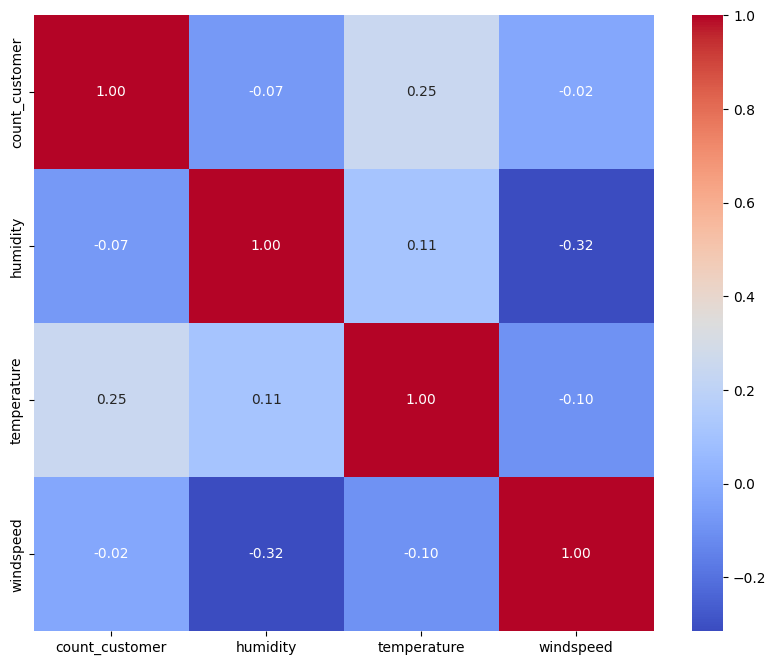

In [ ]:
specific_column = ['count_customer', 'humidity', 'temperature', 'windspeed']
subset_morning_corr = df_morning[specific_column].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(subset_morning_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

correlation data lemah, tidak menunjukkan hubungan dengan sewa sepeda

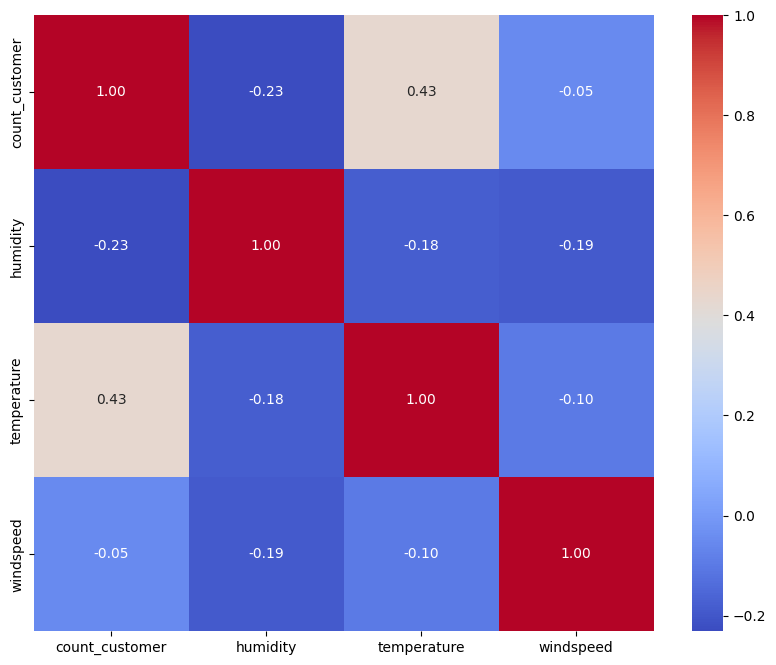

In [ ]:
df_afternoon = df_timegroup[df_timegroup['time_group'] == 'Afternoon']

subset_afternoon_corr = df_afternoon[specific_column].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(subset_afternoon_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

di siang hari mengalami peningkatan correlation antara temperature dan total penyewa, tetapi masih lemah.

#### Bike Share in 2011

In [ ]:
df_2011 = df_copy[df_copy['year'] == 2011]

In [ ]:
df_2011_byseason = df_2011.groupby('season').agg(
    total_customer_casual=('casual', 'sum'),
    total_customer_registered=('registered', 'sum'),
    total_customer=('count_customer', 'sum')
).reset_index()

df_2011_byseason

,season,total_customer_casual,total_customer_registered,total_customer
0,Fall,95450,324200,419650
1,Spring,21425,128575,150000
2,Summer,77564,269752,347316
3,Winter,52813,273324,326137


polanya cukup mirip dengan 1 tahun terakhir

In [ ]:
df_2011_bymonth = df_2011.groupby('month').agg(
    total_customer_casual=('casual', 'sum'),
    total_customer_registered=('registered', 'sum'),
    total_customer=('count_customer', 'sum')
).reset_index()

df_2011_bymonth

,month,total_customer_casual,total_customer_registered,total_customer
0,1,3073,35116,38189
1,2,6242,41973,48215
2,3,12826,51219,64045
3,4,22346,72524,94870
4,5,31050,104771,135821
5,6,30612,112900,143512
6,7,36452,104889,141341
7,8,28842,107849,136691
8,9,26545,100873,127418
9,10,25222,98289,123511


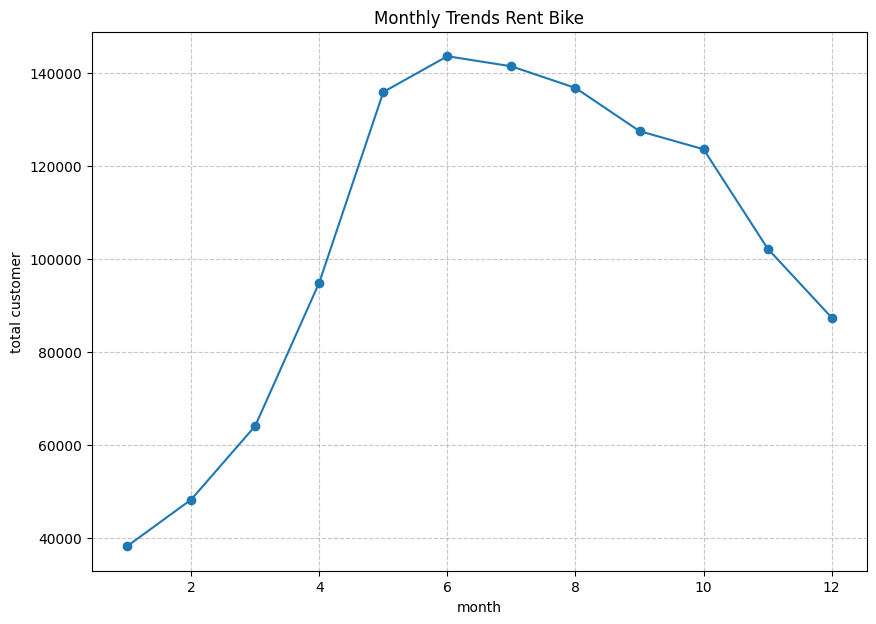

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(
    df_2011_bymonth['month'],
    df_2011_bymonth['total_customer'],
    marker='o',
    linestyle='-'
)

plt.title('Monthly Trends Rent Bike')
plt.xlabel('month')
plt.ylabel('total customer')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

pola cukup mirip, hanya kenaikan tertinggi pada 2011 tepat di tengah musim panas. dan penurunan bermula di musim gugur.

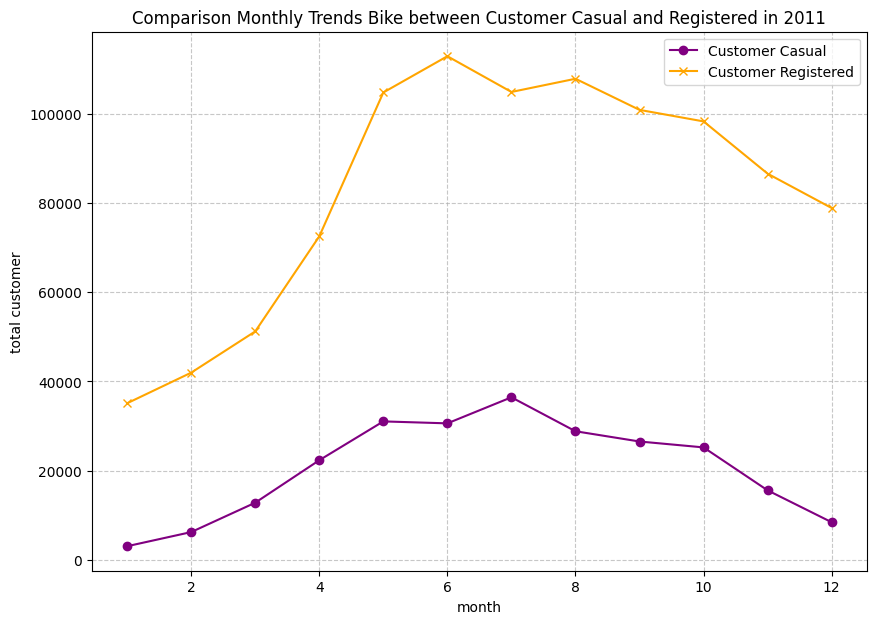

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(
    df_2011_bymonth['month'],
    df_2011_bymonth['total_customer_casual'],
    label='Customer Casual',
    marker='o',
    linestyle='-',
    color='purple'
)

plt.plot(
    df_2011_bymonth['month'],
    df_2011_bymonth['total_customer_registered'],
    label='Customer Registered',
    marker='x',
    linestyle='-',
    color='orange'
)

plt.title('Comparison Monthly Trends Bike between Customer Casual and Registered in 2011')
plt.xlabel('month')
plt.ylabel('total customer')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

sepertinya di 2012, terjadi sedikit perubahan pola sewa sepeda. meskipun masih tetap berada di musim gugur. hanya tren bersepedanya saja

In [ ]:
df_2011_byweekday = df_2011.groupby('weekday').agg(
    avg_customer_casual=('casual', 'mean'),
    avg_customer_registered=('registered', 'mean'),
    avg_customer=('count_customer', 'mean')
).reset_index()

df_2011_byweekday

,weekday,avg_customer_casual,avg_customer_registered,avg_customer
0,Friday,23.771590,123.125908,146.897498
1,Monday,25.554656,120.373279,145.927935
2,Saturday,47.109968,95.091772,142.201741
3,Sunday,48.418359,95.427295,143.845654
4,Thursday,18.318367,124.173061,142.491429
5,Tuesday,19.630933,127.945172,147.576105
6,Wednesday,16.810415,120.837266,137.647681


In [ ]:
sort_weekday_2011 = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

df_2011_byweekday['weekday'] = pd.Categorical(df_2011_byweekday['weekday'], categories=sort_weekday_2011, ordered=True)

df_2011_byweekday = df_2011_byweekday.sort_values('weekday')

df_2011_byweekday

,weekday,avg_customer_casual,avg_customer_registered,avg_customer
3,Sunday,48.418359,95.427295,143.845654
1,Monday,25.554656,120.373279,145.927935
5,Tuesday,19.630933,127.945172,147.576105
6,Wednesday,16.810415,120.837266,137.647681
4,Thursday,18.318367,124.173061,142.491429
0,Friday,23.771590,123.125908,146.897498
2,Saturday,47.109968,95.091772,142.201741


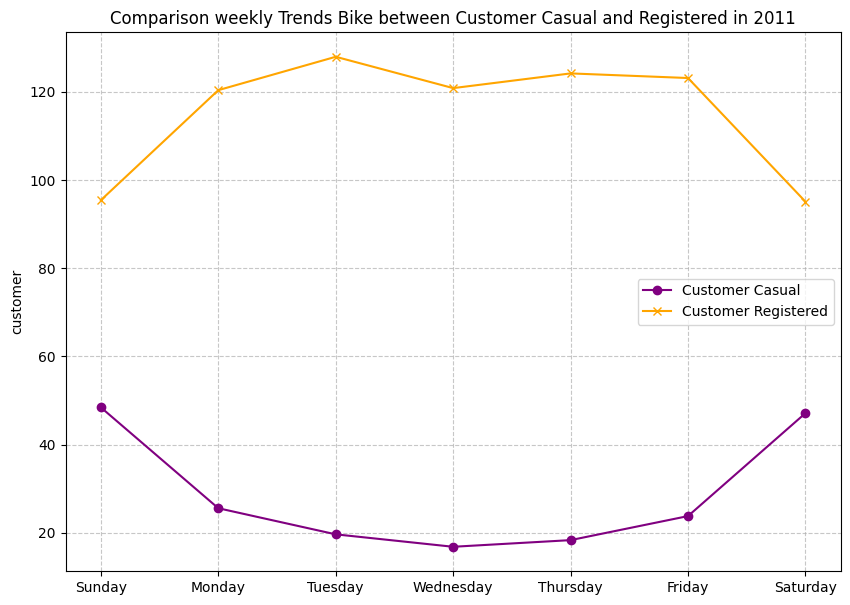

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(
    df_2011_byweekday['weekday'],
    df_2011_byweekday['avg_customer_casual'],
    label='Customer Casual',
    marker='o',
    linestyle='-',
    color='purple'
)

plt.plot(
    df_2011_byweekday['weekday'],
    df_2011_byweekday['avg_customer_registered'],
    label='Customer Registered',
    marker='x',
    linestyle='-',
    color='orange'
)

plt.title('Comparison weekly Trends Bike between Customer Casual and Registered in 2011')
plt.xlabel('')
plt.ylabel('customer')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

trend mingguan masih cukup mirip

In [ ]:
df_holiday_2011 = df_2011.groupby('holiday').agg(
    avg_customer_casual=('casual', 'mean'),
    avg_customer_registered=('registered', 'mean')
).reset_index()

df_holiday_2011

,holiday,avg_customer_casual,avg_customer_registered
0,No,28.254104,116.057221
1,Yes,40.786611,84.828452


In [ ]:
holiday_2011 = df_2011[df_2011['holiday'] == 'Yes']['casual']
not_holiday_2011 = df_2011[df_2011['holiday'] == 'No']['casual']

t_stat, p_val = stats.ttest_ind(holiday_2011, not_holiday_2011)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

T-statistic: 4.9254
P-value: 0.0000


pada 2011 peningkatan customer casual pada saat holiday justru signifikan.

In [ ]:
t_stat, p_val = stats.ttest_ind(holiday_2012, holiday_2011)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

T-statistic: 1.4263
P-value: 0.1544


peningkatan customer holiday di 2012 tidak signifikan

In [ ]:
df_workingday_2011 = df_2011.groupby('workingday').agg(
    avg_customer_casual=('casual', 'mean'),
    avg_customer_registered=('registered', 'mean')
).reset_index()

df_workingday_2011

,workingday,avg_customer_casual,avg_customer_registered
0,No,47.146306,94.345647
1,Yes,20.022670,124.836745


In [ ]:
workingday_2011 = df_2011[df_2011['workingday'] == 'Yes']['casual']
offwork_2011 = df_2011[df_2011['workingday'] == 'No']['casual']

t_stat, p_val = stats.ttest_ind(workingday_2011, offwork_2011)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

T-statistic: -31.9215
P-value: 0.0000


peningkatan customer off work untuk customer casual di 2011 signifikan.

In [ ]:
t_stat, p_val = stats.ttest_ind(workingday_2012, workingday_2011)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

T-statistic: 21.0153
P-value: 0.0000


penigkatan customer casual masih signifikan di off work. bisa di targtkan program loyal untuk menjadi customer registered pada saat Off Work karena memang banyak customer casual mennggunakan menyewa sepeda pada saat libur kerja.

## Analisis Lanjutan (Opsional)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Daily Predict Total Customer

In [ ]:
df_daily_rent = df_copy.groupby(['date_day', 'season']).agg(
    total_customer=('count_customer', 'sum'),
    temperature=('temperature', 'mean'),
    humidity=('humidity', 'mean')
).reset_index()

In [ ]:
df_daily_rent.set_index('date_day', inplace=True)

In [ ]:
sort_season = ['Spring', 'Summer', 'Fall', 'Winter']

df_daily_rent['season'] = pd.Categorical(df_daily_rent['season'], categories=sort_season, ordered=True)

df_daily_rent = df_daily_rent.sort_values('season')

df_daily_rent

,season,total_customer,temperature,humidity
date_day,,,,
2011-01-01,Spring,985,8.175833,80.583333
2012-01-18,Spring,3376,6.256667,44.333333
2012-01-19,Spring,3292,0.930000,49.750000
2012-01-20,Spring,3163,2.222500,45.000000
2012-01-21,Spring,1301,0.146667,83.125000
...,...,...,...,...
2011-11-23,Winter,2566,12.719167,75.791667
2011-11-24,Winter,1495,9.546667,54.916667
2011-11-25,Winter,2792,9.625000,64.375000


In [ ]:
X = df_daily_rent[['temperature', 'humidity']].copy()
y = df_daily_rent['total_customer']

In [ ]:
X

,temperature,humidity
date_day,,
2011-01-01,8.175833,80.583333
2012-01-18,6.256667,44.333333
2012-01-19,0.930000,49.750000
2012-01-20,2.222500,45.000000
2012-01-21,0.146667,83.125000
...,...,...
2011-11-23,12.719167,75.791667
2011-11-24,9.546667,54.916667
2011-11-25,9.625000,64.375000


In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

sc = StandardScaler()
X_encoded = pd.DataFrame(
    sc.fit_transform(X),
    columns=['temperature_encoded', 'humidity_encoded'],
    index=X.index
)

In [ ]:
X_encoded

,temperature_encoded,humidity_encoded
date_day,,
2011-01-01,-0.826664,1.250174
2012-01-18,-1.049888,-1.296695
2012-01-19,-1.669447,-0.916128
2012-01-20,-1.519113,-1.249856
2012-01-21,-1.760558,1.428747
...,...,...
2011-11-23,-0.298216,0.913519
2011-11-24,-0.667219,-0.553126
2011-11-25,-0.658107,0.111401


In [ ]:
season_dummies = pd.get_dummies(df_daily_rent['season'], prefix='season', drop_first=True, dtype=int)

In [ ]:
season_dummies

,season_Summer,season_Fall,season_Winter
date_day,,,
2011-01-01,0,0,0
2012-01-18,0,0,0
2012-01-19,0,0,0
2012-01-20,0,0,0
2012-01-21,0,0,0
...,...,...,...
2011-11-23,0,0,1
2011-11-24,0,0,1
2011-11-25,0,0,1


In [ ]:
daily_encoded = pd.concat([df_daily_rent, season_dummies, X_encoded], axis=1)

In [ ]:
daily_encoded.head()

,season,total_customer,temperature,humidity,season_Summer,season_Fall,season_Winter,temperature_encoded,humidity_encoded
date_day,,,,,,,,,
2011-01-01,Spring,985,8.175833,80.583333,0,0,0,-0.826664,1.250174
2012-01-18,Spring,3376,6.256667,44.333333,0,0,0,-1.049888,-1.296695
2012-01-19,Spring,3292,0.930000,49.750000,0,0,0,-1.669447,-0.916128
2012-01-20,Spring,3163,2.222500,45.000000,0,0,0,-1.519113,-1.249856
2012-01-21,Spring,1301,0.146667,83.125000,0,0,0,-1.760558,1.428747


In [ ]:
daily_encoded.tail()

,season,total_customer,temperature,humidity,season_Summer,season_Fall,season_Winter,temperature_encoded,humidity_encoded
date_day,,,,,,,,,
2011-11-23,Winter,2566,12.719167,75.791667,0,0,1,-0.298216,0.913519
2011-11-24,Winter,1495,9.546667,54.916667,0,0,1,-0.667219,-0.553126
2011-11-25,Winter,2792,9.625000,64.375000,0,0,1,-0.658107,0.111401
2011-11-05,Winter,3926,7.353333,51.916667,0,0,1,-0.922331,-0.763902
2011-12-06,Winter,2594,13.737500,94.958333,0,0,1,-0.179771,2.260139


In [ ]:
daily_encoded = daily_encoded.sort_index(ascending=True)
daily_encoded

,season,total_customer,temperature,humidity,season_Summer,season_Fall,season_Winter,temperature_encoded,humidity_encoded
date_day,,,,,,,,,
2011-01-01,Spring,985,8.175833,80.583333,0,0,0,-0.826664,1.250174
2011-01-02,Spring,801,9.083478,69.608696,0,0,0,-0.721093,0.479113
2011-01-03,Spring,1349,1.229091,43.727273,0,0,0,-1.634659,-1.339276
2011-01-04,Spring,1562,1.400000,59.043478,0,0,0,-1.614780,-0.263183
2011-01-05,Spring,1600,2.666957,43.695652,0,0,0,-1.467417,-1.341498
...,...,...,...,...,...,...,...,...,...
2012-12-27,Spring,2114,3.945833,65.291667,0,0,0,-1.318667,0.175805
2012-12-28,Spring,3095,3.906667,59.000000,0,0,0,-1.323222,-0.266238
2012-12-29,Spring,1341,3.906667,75.291667,0,0,0,-1.323222,0.878389


In [ ]:
len(daily_encoded)

731

In [ ]:
n = len(daily_encoded)

train_size = int(n * 0.9)

train_df = daily_encoded.iloc[:train_size]
test_df = daily_encoded.iloc[train_size:]

print('train_size:', len(train_df))
print('test_size:', len(test_df))

train_size: 657
test_size: 74


In [ ]:
exog_vars_train = train_df[['temperature_encoded', 'humidity_encoded']]
y_train = train_df['total_customer']

In [ ]:
exog_vars_test = test_df[['temperature_encoded', 'humidity_encoded']]
y_test = test_df['total_customer']

In [ ]:
model = SARIMAX(y_train,
                exog=exog_vars_train,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 7))

results = model.fit()
print(results.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                    total_customer   No. Observations:                  657
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -5231.772
Date:                           Fri, 30 Jan 2026   AIC                          10477.545
Time:                                   03:01:14   BIC                          10508.873
Sample:                               01-01-2011   HQIC                         10489.697
                                    - 10-18-2012                                         
Covariance Type:                             opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
temperature_encoded   882.8810     83.011     10.636      0.000     720.183    1045.579
humidity_encoded

Insight:
- feature untuk prediksi total customer perharinya diperngaruhi oleh temperature dan humidity. dibuktikan dengan nilai p_value kurang dari 5%.

interpretasi model:
- Setiap 1 derajat temperature meningkat, customer diprediksi bertambah sekitar 883. dengan error sebesar 83 prediksi.
- setiap 1% humidity meningkat, customer yang menyewa sepeda berkurang sebesar 422 orang. dengan error prediksi sebesar 25 orang.

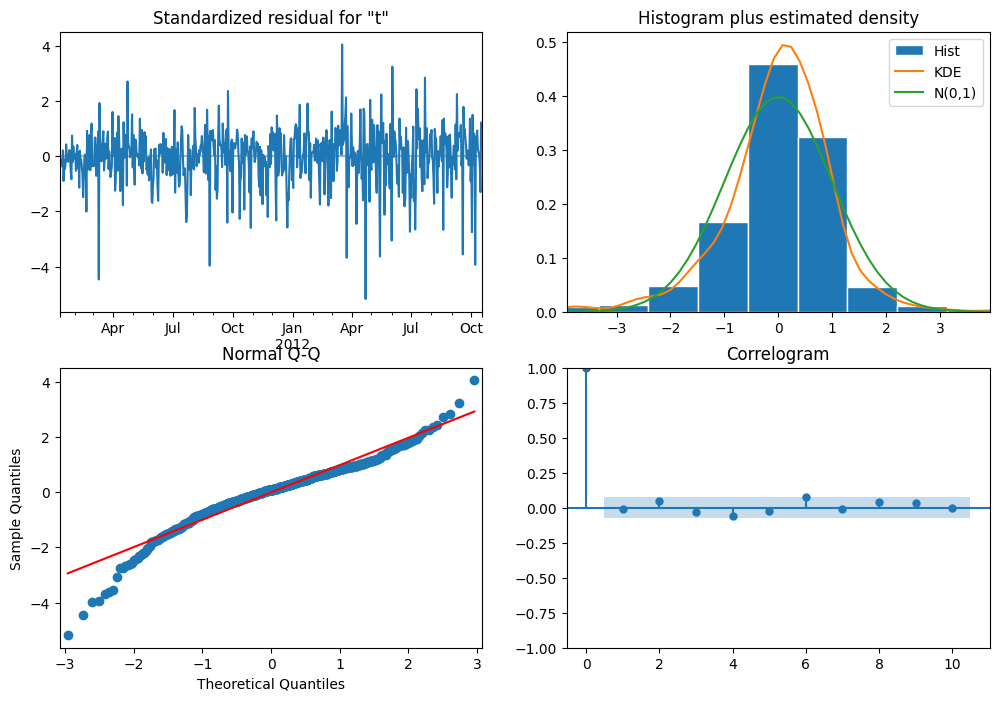

In [ ]:
results.plot_diagnostics(figsize=(12, 8))
plt.show()

In [ ]:
model_fit = model.fit(disp=False)
forecast = model_fit.get_forecast(steps=len(test_df), exog=exog_vars_test)
y_pred = forecast.predicted_mean

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")

MAE: 1994.3260312009872
RMSE: 2534.898207029515
MAPE: 459.2940120974734%


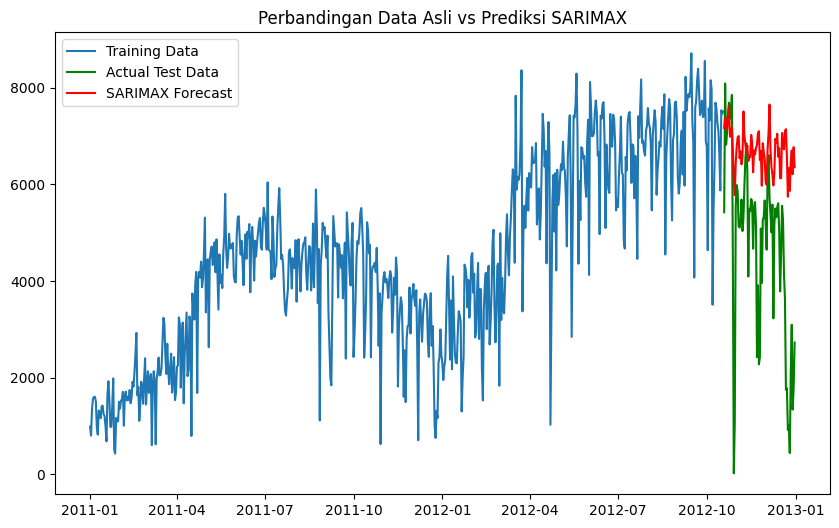

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_train.index, y_train, label='Training Data')
plt.plot(y_test.index, y_test, label='Actual Test Data', color='green')
plt.plot(y_test.index, y_pred, label='SARIMAX Forecast', color='red')
plt.title('Perbandingan Data Asli vs Prediksi SARIMAX')
plt.legend()
plt.show()

Plot prediksi time series

In [ ]:
daily_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
total_customer,731.0,4.504349e+03,1937.211452,22.000000,3152.000000,4548.000000,5956.000000,8714.000000
temperature,731.0,1.528309e+01,8.603397,-5.220870,7.842917,15.421667,22.804583,32.498333
humidity,731.0,6.278941e+01,14.242909,0.000000,52.000000,62.666667,73.020833,97.250000
season_Summer,731.0,2.517100e-01,0.434293,0.000000,0.000000,0.000000,1.000000,1.000000
season_Fall,731.0,2.571819e-01,0.437380,0.000000,0.000000,0.000000,1.000000,1.000000
season_Winter,731.0,2.435021e-01,0.429489,0.000000,0.000000,0.000000,0.000000,1.000000
temperature_encoded,731.0,2.041231e-16,1.000685,-2.384871,-0.865386,0.016119,0.874846,2.002353
humidity_encoded,731.0,-3.985260e-16,1.000685,-4.411486,-0.758047,-0.008624,0.718844,2.421148


#### What is the predicted total number of daily bike renters?

prediksi untuk 6 hari kedepan

Hasil Prediksi 6 Hari ke Depan:
2012-10-19    7345.964084
2012-10-20    6760.968630
2012-10-21    5210.204286
2012-10-22    5221.786512
2012-10-23    4871.211139
2012-10-24    5273.268822
Freq: D, Name: mean, dtype: float64


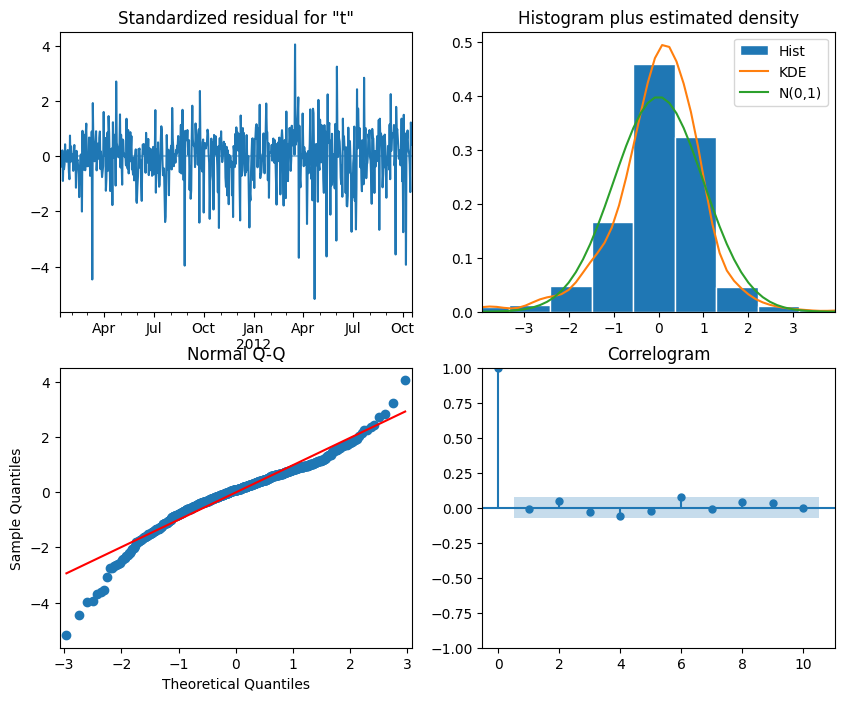

In [ ]:
exog_forecast = pd.DataFrame({'temperature_encoded': [-0.016, -0.345, -2, -0.87, -2.3, -0.23],
                              'humidity_encoded': [0.086, 0.5, 0.006, 2.4, 0.65, 4.1]})
forecast = results.get_forecast(steps=6, exog=exog_forecast)
print("Hasil Prediksi 6 Hari ke Depan:")
print(forecast.summary_frame()['mean'])

results.plot_diagnostics(figsize=(10, 8))
plt.show()

### Casual Customer

In [ ]:
df_casual = df_copy.groupby(['date_day', 'workingday']).agg(
    casual_customer=('casual', 'sum'),
    temperature=('temperature', 'mean'),
    humidity=('humidity', 'mean')
).reset_index()

In [ ]:
df_casual.head()

,date_day,workingday,casual_customer,temperature,humidity
0,2011-01-01,No,331,8.175833,80.583333
1,2011-01-02,No,131,9.083478,69.608696
2,2011-01-03,Yes,120,1.229091,43.727273
3,2011-01-04,Yes,108,1.400000,59.043478
4,2011-01-05,Yes,82,2.666957,43.695652


In [ ]:
df_casual.set_index('date_day', inplace=True)

In [ ]:
num_col = df_casual[['temperature', 'humidity']].copy()

In [ ]:
sc = StandardScaler()
num_encoded = pd.DataFrame(
    sc.fit_transform(num_col),
    columns=['temperature_encoded', 'humidity_encoded'],
    index=num_col.index
)

In [ ]:
num_encoded.head()

,temperature_encoded,humidity_encoded
date_day,,
2011-01-01,-0.826664,1.250174
2011-01-02,-0.721093,0.479113
2011-01-03,-1.634659,-1.339276
2011-01-04,-1.614780,-0.263183
2011-01-05,-1.467417,-1.341498


In [ ]:
working_dummies = pd.get_dummies(df_casual['workingday'], drop_first=True, dtype=int)

In [ ]:
working_dummies

,Yes
date_day,
2011-01-01,0
2011-01-02,0
2011-01-03,1
2011-01-04,1
2011-01-05,1
...,...
2012-12-27,1
2012-12-28,1
2012-12-29,0


In [ ]:
casual_encoded = pd.concat([df_casual, working_dummies, num_encoded], axis=1)

In [ ]:
casual_encoded = casual_encoded.sort_index(ascending=True)
casual_encoded

,workingday,casual_customer,temperature,humidity,Yes,temperature_encoded,humidity_encoded
date_day,,,,,,,
2011-01-01,No,331,8.175833,80.583333,0,-0.826664,1.250174
2011-01-02,No,131,9.083478,69.608696,0,-0.721093,0.479113
2011-01-03,Yes,120,1.229091,43.727273,1,-1.634659,-1.339276
2011-01-04,Yes,108,1.400000,59.043478,1,-1.614780,-0.263183
2011-01-05,Yes,82,2.666957,43.695652,1,-1.467417,-1.341498
...,...,...,...,...,...,...,...
2012-12-27,Yes,247,3.945833,65.291667,1,-1.318667,0.175805
2012-12-28,Yes,644,3.906667,59.000000,1,-1.323222,-0.266238
2012-12-29,No,159,3.906667,75.291667,0,-1.323222,0.878389


In [ ]:
n2 = len(casual_encoded)

train_size2 = int(n2 * 0.9)

train_df2 = casual_encoded.iloc[:train_size2]
test_df2 = casual_encoded.iloc[train_size2:]

print('train_size:', len(train_df2))
print('test_size:', len(test_df2))

train_size: 657
test_size: 74


In [ ]:
exog_vars_train2 = train_df2[['temperature_encoded', 'humidity_encoded', 'Yes']]
y_train2 = train_df2['casual_customer']

In [ ]:
exog_vars_test2 = test_df2[['temperature_encoded', 'humidity_encoded', 'Yes']]
y_test2 = test_df2['casual_customer']

In [ ]:
model2 = SARIMAX(y_train2,
                exog=exog_vars_train2,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 7))

results2 = model2.fit()
print(results2.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                   casual_customer   No. Observations:                  657
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -4692.195
Date:                           Fri, 30 Jan 2026   AIC                           9400.389
Time:                                   03:01:33   BIC                           9436.193
Sample:                               01-01-2011   HQIC                          9414.278
                                    - 10-18-2012                                         
Covariance Type:                             opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
temperature_encoded   349.5119     29.218     11.962      0.000     292.246     406.778
humidity_encoded

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


insight:
- Customer casual dipengaruhi oleh data temperature, humidity, dan workingday.

interpretasi model:
- 1 derajat temperature bertambah. customer menyewa lebih banyak sekitar 349. dengan error 29 prediksi.
- 1 kelembaban bertambah, menyebabkan minat customer casual turun. pengurangan sebesar 107 customer. dengan error 13 prediksi.
- jika hari tersebut adalah hari kerja. customer berkurang sebesar 411 orang. dengan error prediksi sebear 48

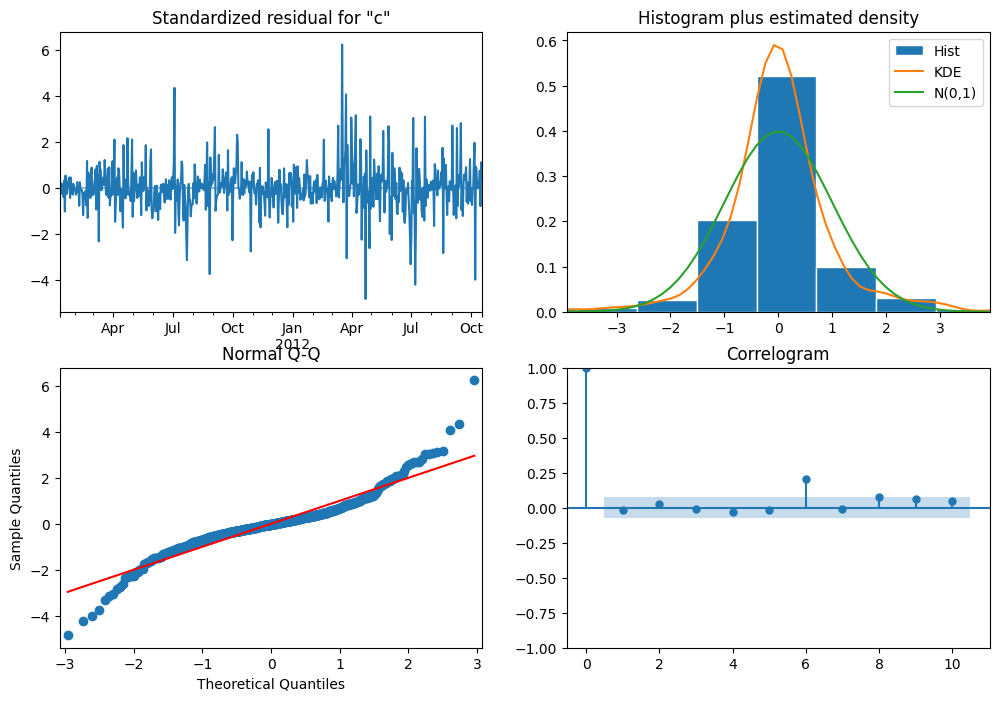

In [ ]:
results2.plot_diagnostics(figsize=(12, 8))
plt.show()

In [ ]:
model_fit2 = model2.fit(disp=False)
forecast2 = model_fit2.get_forecast(steps=len(test_df2), exog=exog_vars_test2)
y_pred2 = forecast2.predicted_mean

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
mae = mean_absolute_error(y_test2, y_pred2)
mse = mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test2 - y_pred2) / y_test2)) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")

MAE: 408.14126854387024
RMSE: 589.9531966569948
MAPE: 482.8969781187993%


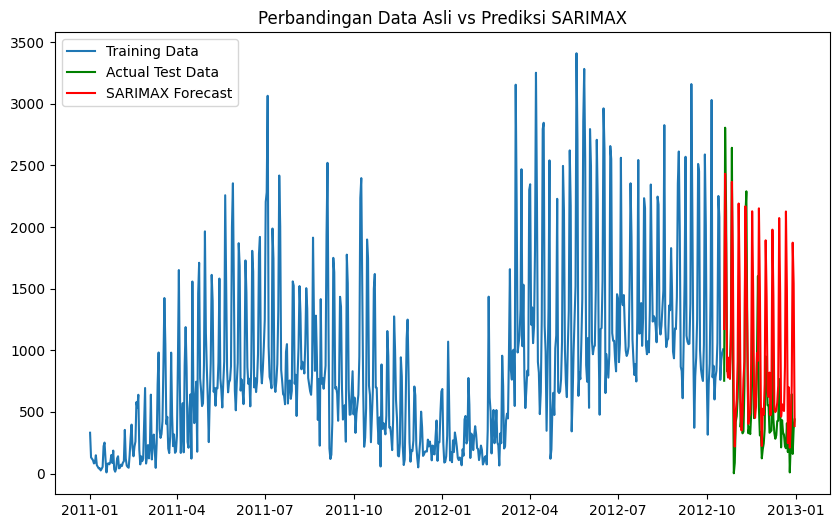

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_train2.index, y_train2, label='Training Data')
plt.plot(y_test2.index, y_test2, label='Actual Test Data', color='green')
plt.plot(y_test2.index, y_pred2, label='SARIMAX Forecast', color='red')
plt.title('Perbandingan Data Asli vs Prediksi SARIMAX')
plt.legend()
plt.show()

## Conclusion

- Customer menyewa sepeda dipengaruhi oleh **dua faktor** yaitu **temperatur** dan **kelembaban**. semakin tinggi temperaturnya semakin banyak customer yang menyewa sepeda. disisi lain semakin tinggi kelembabannya semakin berkurang customer yang menyewa sepeda. ini bisa menjadi bukti kenapa pada musim panas dan gugur cocok untuk bersepeda.

- Sewa **sepeda tertinggi** terjadi pada saat jam berangkat kerja dan pulang kerja. sekitar jam **8** dan jam **18** **- 19**. **customer ini merupakan customer registered** yang dari polanya mereka menggunakan sepeda untuk transportasi sehari - hari.

- Disisi lain kita juga memiliki waktu spesific yang bisa kita gunakan untuk melakukan **maintenance**. yaitu pada saat **malam hari sekitar jam 23 - 5 pagi**. karena di jam tersebut sewa sepeda cenderung menurun selama di 2012 ini.

- **Customer casual** ini ada kemungkinan mereka adalah **wisatawan** atau **pengguna biasa saja**. sewa sepeda pada customer ini meningkat signifikan pada saat **libur kerja** (sabtu, minggu). kita bisa manfaatkan ini untuk menawarkan **program mingguan subcription** atau **2 hari subcription**. dengan menunjukkan benefit program loyal Dicobike.

## Recommendation
General:
- maintenance rutin pada saat musim semi. agar seluruh sepeda dalam kondisi prima saat lonjakan sewa sepeda di maret atau peralihan ke musim panas.

- maintenance harian di jam 23 - 5 pagi, untuk memastikan sepeda bisa digunakan pada saat jam berangkat kerja.


Customer Loyal (Registered)
- Tawarkan program langganan tahunan untuk mengunci loyalitas mereka pada saat musim semi.

Customer Casual
- terapkan dynamic price dengan meningkatkan harga di hari Sabtu dan Minggu atau saat cuaca cerah untuk memaksimalkan margin.

- tawarkan program loyal 2 hari atau mingguan dengan harga diskon saat harga naik di Sabtu dan Minggu.

- tawarkan paket bundling => "Waktu Liburan!!" untuk keluarga atau grup.

In [ ]:
df_copy.head()

,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count_customer
0,2011-01-01,Spring,2011,1,0,No,Saturday,No,Clear,3.28,3.0014,81.0,0.0,3,13,16
1,2011-01-01,Spring,2011,1,1,No,Saturday,No,Clear,2.34,1.9982,80.0,0.0,8,32,40
2,2011-01-01,Spring,2011,1,2,No,Saturday,No,Clear,2.34,1.9982,80.0,0.0,5,27,32
3,2011-01-01,Spring,2011,1,3,No,Saturday,No,Clear,3.28,3.0014,75.0,0.0,3,10,13
4,2011-01-01,Spring,2011,1,4,No,Saturday,No,Clear,3.28,3.0014,75.0,0.0,0,1,1


In [ ]:
df_copy.to_csv('rent_bike.csv', index=False)

Convert menjadi file csv